Import libraries

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Function to generate max $\rho$ value

In [26]:
def get_rho_val(I):
    '''
    Function generates the max rho value
    given the image.
    '''
    D_max = np.sqrt(np.square(I.shape[0])+np.square(I.shape[1]))
    D_max_int = np.rint(D_max).astype(np.int32)
    return D_max, D_max_int

Function generates the hough transform for a given image

In [27]:
def houghTransform(I,pts):
    '''
    Function generates the hough tranform of a given image
    and candidate edge points.
    '''
    D_max, D_max_int = get_rho_val(I)
    theta = np.linspace(-90,90,181)
    acc = np.zeros(shape = (2*D_max_int+1,theta.shape[0]))

    for i in range(len(pts[0])):
        # Sweep across all theta vaues
        rho = pts[1][i]*np.cos(np.pi*theta/180) + pts[0][i]*np.sin(np.pi*theta/180)
        
        # Accumalate votes
        rho_bins = np.rint(rho).astype(np.int32)
        np.add.at(acc, (rho_bins+D_max_int,range(theta.shape[0])), 1)
    extent = [-90 , 90, -D_max_int , D_max_int]
    return extent,acc

Function used to draw line.

In [28]:
def drawLine(I, acc, threshold = 2,color = (1,0,0), thickness =1, angleThreshold = [-90,90]):
    '''
    Function filters candidate based on votes and angle.
    Lines corresponding to filtered candidates are plotted 
    on the given image (I).
    '''
    candidates = np.where(np.greater(acc,threshold))
    D_max, D_max_int = get_rho_val(I)

    for i in range(len(candidates[0])):

        x = candidates[0][i]
        rho = x - D_max_int
        theta_deg = (candidates[1][i]-90)
        
        if(np.logical_or(theta_deg < angleThreshold[0] , theta_deg > angleThreshold[1])):
            continue
            
        theta = theta_deg/180*np.pi
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1200*(-b))
        y1 = int(y0 + 1200*(a))
        x2 = int(x0 - 1200*(-b))
        y2 = int(y0 - 1200*(a))
        
        cv2.line(I,(x1,y1),(x2,y2),color,thickness)
    
    return I;

(i)\
Hough transform on 11x11 image with 5 points

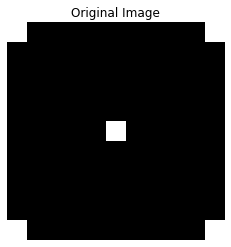

In [29]:
# Generate test image
s = 11
img = np.zeros(shape = (s,s))
pts = ([0,0,s-1,s-1,int(s/2)],[0,s-1,0,s-1,int(s/2)])
img[pts[:]] = 1

plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

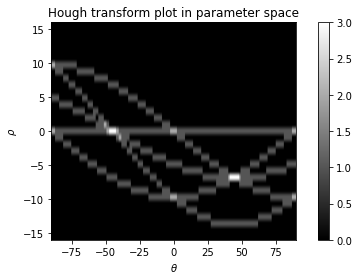

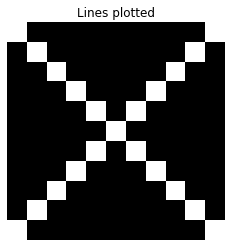

In [30]:
extent, acc = houghTransform(img,pts)

# Plot Accumalator plot in rho-theta parameter space
fig, ax = plt.subplots(1,1, figsize = (8,4))
im = plt.imshow(acc, cmap='gray',extent=extent,aspect = 5)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough transform plot in parameter space')
plt.colorbar(im, fraction = 0.05)
plt.show()

drawLine(img, acc, 2, [255, 0, 0], 1)

plt.title('Lines plotted')
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

(iii)\
Hough transform on lane image

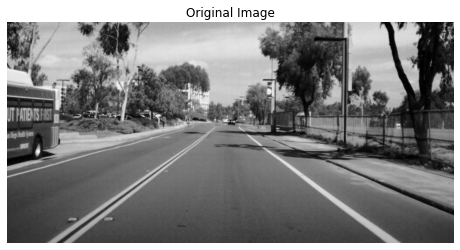

In [31]:
img = cv2.imread('lane.png',0)
plt.figure(figsize=(8,8))
plt.title('Original Image')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.show()

Performing canny edge detection on given image

array([  0, 255], dtype=uint8)

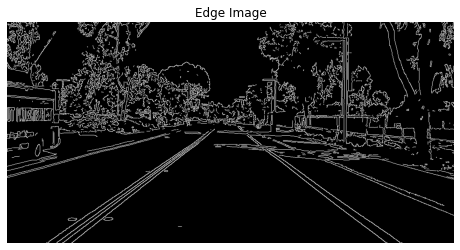

In [32]:
# Perform Canny edge detection
edges = cv2.Canny(np.copy(img),150,200)
plt.figure(figsize=(8,8))
plt.imshow(edges,cmap = 'gray')
plt.axis('off')
plt.title('Edge Image')
np.unique(edges)

In [33]:
pts = np.where(edges == 255)
extent, acc = houghTransform(edges, pts)

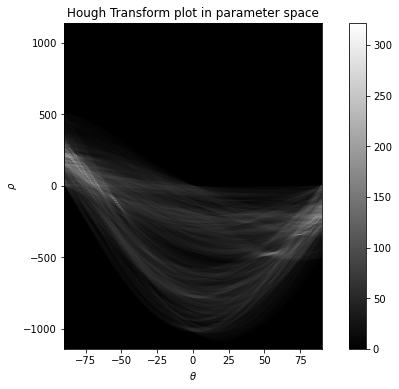

In [34]:
# Plot Hough transgorm plot in rho-theta parameter space
plt.subplots(1,1, figsize = (10,6))

im = plt.imshow(acc, cmap='gray',extent=extent,aspect = 0.1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Transform plot in parameter space')
plt.colorbar(im, fraction = 0.05)
plt.show()

Plotting all lines in the greater than 0.75 times the max value

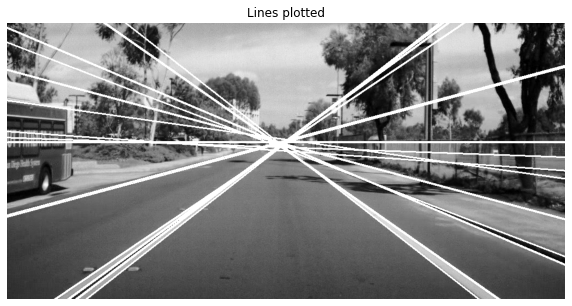

In [35]:
drawLine(img, acc, np.max(acc)*0.75,[255,0,0],2)

plt.figure(figsize = (10,6))
plt.title('Lines plotted')
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.show()

Thresholding lines based on angle to extract lines corresponding to the lines. 
These lines are in the range [-55, -50] and [50,55] degree.

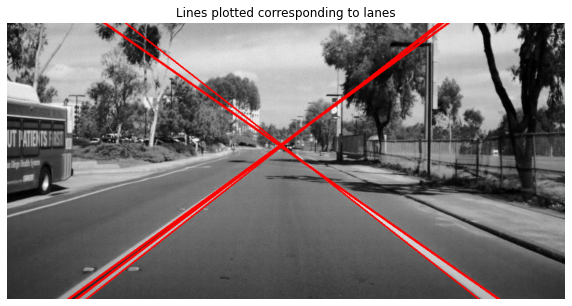

In [36]:
img1 = cv2.imread('lane.png')
drawLine(img1, acc, np.max(acc)*0.75,[255,0,0],2,[50,55])
drawLine(img1, acc, np.max(acc)*0.75,[255,0,0],2,[-55,-50])
plt.figure(figsize = (10,6))
plt.title('Lines plotted corresponding to lanes')
plt.axis('off')
plt.imshow(img1,cmap='gray')
plt.show()